In [37]:
%set_env QXToken=db34b5f04d0f1c2616367a6da518c5ceea4cecd4f3c5fdaf21303a5de9f201f75beab1afa9c23f1671a0acd9912f3fc5ff19f6b61bcfa9a53b14f121b6614832


env: QXToken=db34b5f04d0f1c2616367a6da518c5ceea4cecd4f3c5fdaf21303a5de9f201f75beab1afa9c23f1671a0acd9912f3fc5ff19f6b61bcfa9a53b14f121b6614832


In [38]:
import numpy as np
from typing import List, Callable
from scipy.optimize import minimize
from scipy.optimize._optimize import OptimizeResult
import matplotlib.pyplot as plt
import qiskit.visualization

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, SparsePauliOp
from qiskit.primitives import StatevectorSampler, PrimitiveJob
from qiskit.circuit.library import TwoLocal
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator
from qiskit_aer import AerSimulator

In [39]:
from qc_grader.challenges.iqc_2024 import (
    grade_lab1_ex1,
    grade_lab1_ex2,
    grade_lab1_ex3,
    grade_lab1_ex4,
    grade_lab1_ex5,
    grade_lab1_ex6,
    grade_lab1_ex7,
)

In [40]:

!pip install qiskit[visualization]==1.0.2
!pip install qiskit_aer
!pip install qiskit_ibm_runtime
!pip install matplotlib
!pip install pylatexenc
!pip install qiskit-transpiler-service
!pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git
!pip install qiskit==1.0.2

  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to c:\users\rebecca tsekanovskiy\appdata\local\temp\pip-req-build-_usceprr
  Resolved https://github.com/qiskit-community/Quantum-Challenge-Grader.git to commit 1742268fcb91b9f53c7f9ca83d3511adf200f3a9
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/Quantum-Challenge-Grader.git 'C:\Users\Rebecca Tsekanovskiy\AppData\Local\Temp\pip-req-build-_usceprr'


In [41]:
import qiskit
qiskit.__version__

'1.0.2'

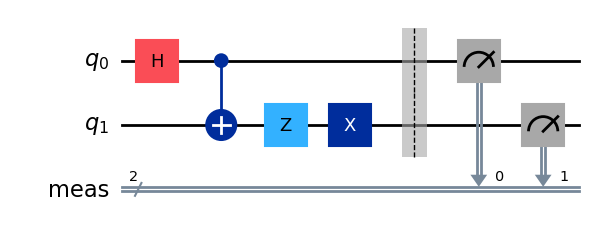

In [42]:
# Build a circuit to form a psi-minus Bell state
# Apply gates to the provided QuantumCircuit, qc
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)

qc.h(0)       # Apply Hadamard gate to the first qubit
qc.cx(0, 1)   # Apply CNOT gate with control qubit 0 and target qubit 1
qc.z(1)       # Apply Z gate to the second qubit
qc.x(1) 


### Don't change any code past this line ###
qc.measure_all()
qc.draw('mpl')

In [43]:
import qiskit
qiskit.__version__

'1.0.2'

In [44]:
grade_lab1_ex1(qc) # Expected result type: QuantumCircuit

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [45]:
qc.measure_all()

### Write your code below here ###
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.primitives import Sampler


# Define the sampler, pub, and job_sampler
sampler = StatevectorSampler()
pub = (qc, )
job_sampler = sampler.run([pub])

### Don't change any code past this line ###

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'01': 510, '10': 514}


In [46]:

grade_lab1_ex2(job_sampler) # Expected result type: PrimitiveJob

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


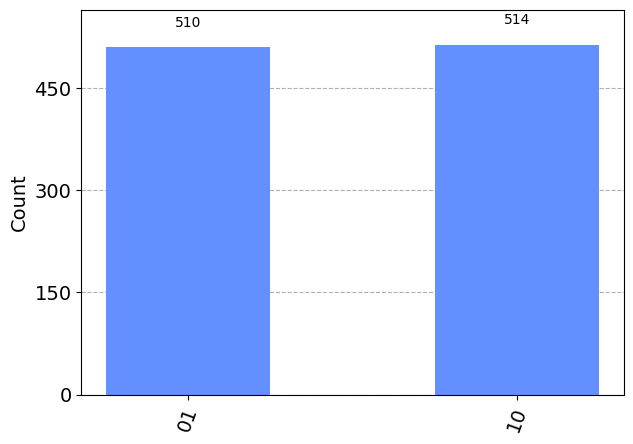

In [47]:
plot_histogram(counts_sampler)

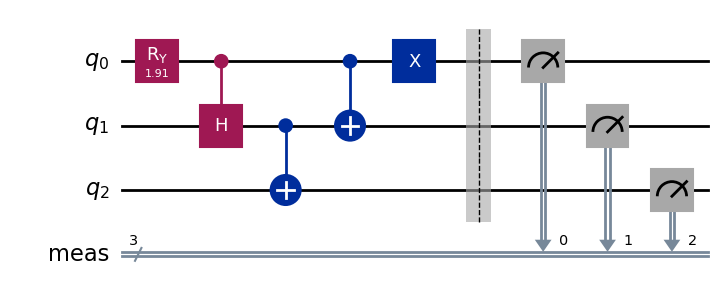

In [48]:
from qiskit import QuantumCircuit

# Step 1: Initialize a 3-qubit quantum circuit
qc = QuantumCircuit(3)

# Step 2: Perform an Ry rotation on qubit 0
qc.ry(1.91063324, 0)

# Step 3: Perform a controlled Hadamard gate on qubit 1, with control qubit 0
qc.ch(0, 1)

# Step 4: Add a CNOT gate with control qubit 1 and target qubit 2
qc.cx(1, 2)

# Step 5: Add a CNOT gate with control qubit 0 and target qubit 1
qc.cx(0, 1)

# Step 6: Add an X gate on qubit 0
qc.x(0)

### Don't change any code past this line ###
qc.measure_all()
qc.draw('mpl')


In [49]:
grade_lab1_ex3(qc) # Expected result type: # Expected result type: QuantumCircuit


Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [50]:
sampler = StatevectorSampler()
pub = (qc)
job_sampler = sampler.run([pub], shots=10000)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'100': 3370, '001': 3340, '010': 3290}


In [51]:
sampler = StatevectorSampler()
pub = (qc)
job_sampler = sampler.run([pub], shots=10000)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'010': 3379, '100': 3311, '001': 3310}


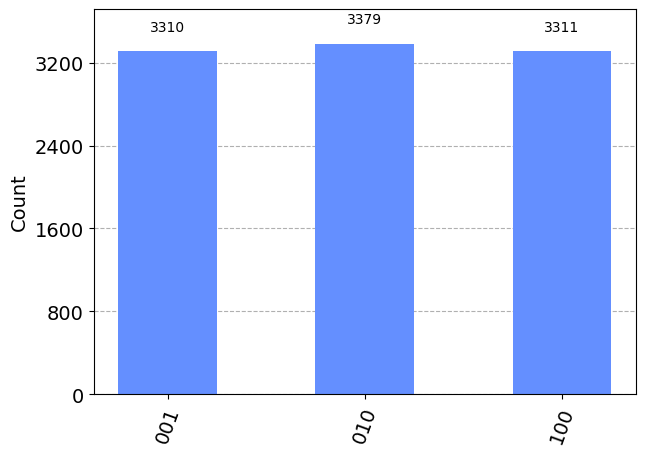

In [52]:
plot_histogram(counts_sampler)


In [53]:
pauli_op = SparsePauliOp(['ZII', 'IZI', 'IIZ'])
print(pauli_op.to_matrix())

[[ 3.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -3.+0.j]]


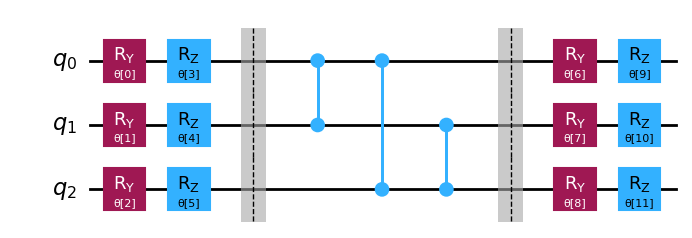

In [54]:
num_qubits = 3
rotation_blocks = ['ry','rz']
entanglement_blocks = 'cz'
entanglement = 'full'

ansatz = TwoLocal(num_qubits=num_qubits, 
                  rotation_blocks=rotation_blocks, 
                  entanglement_blocks=entanglement_blocks, 
                  entanglement=entanglement, 
                  reps=1, 
                  insert_barriers=True)


### Don't change any code past this line ###
ansatz.decompose().draw('mpl')

In [55]:
grade_lab1_ex4(num_qubits, rotation_blocks, entanglement_blocks, entanglement) # Expected result type: int, List[str], str, str


Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [56]:
num_params = ansatz.num_parameters
num_params

12

In [57]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.quantum_info import SparsePauliOp
from qiskit import QuantumCircuit, QuantumRegister
from qiskit_ibm_runtime import QiskitRuntimeService
backend_answer  = FakeSherbrooke()

optimization_level_answer = 3
pm = generate_preset_pass_manager(backend=backend_answer,optimization_level=optimization_level_answer)
isa_circuit = pm.run(ansatz)


# ansatz is used to optimize system

In [58]:
grade_lab1_ex5(isa_circuit) # Expected result type: QuantumCircuit


Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [59]:
sampler = StatevectorSampler()
pub = (qc)
job_sampler = sampler.run([pub], shots=10000)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'001': 3292, '010': 3383, '100': 3325}


In [60]:
pauli_op = SparsePauliOp(['ZII', 'IZI', 'IIZ'])
print(pauli_op.to_matrix())

[[ 3.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -3.+0.j]]


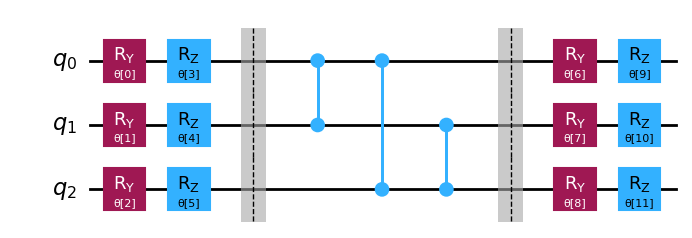

In [61]:
num_qubits = 3
rotation_blocks = ['ry', 'rz']  # Rotation gates
entanglement_blocks = 'cz'  # Entanglement gate
entanglement = 'full'  # Entanglement pattern

ansatz =TwoLocal(num_qubits=num_qubits, 
                  rotation_blocks=rotation_blocks, 
                  entanglement_blocks=entanglement_blocks, 
                  entanglement=entanglement, 
                  reps=1, 
                  insert_barriers=True)

### Don't change any code past this line ###
ansatz.decompose().draw('mpl')

In [62]:
grade_lab1_ex4(num_qubits, rotation_blocks, entanglement_blocks, entanglement) # Expected result type: int, List[str], str, str


Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [63]:
optimization_level_answer = 3

# Define the backend
backend = FakeSherbrooke()

# Generate the preset pass manager
pm = generate_preset_pass_manager(backend=backend, optimization_level=optimization_level_answer)

# Transpile the ansatz circuit using the pass manager
isa_circuit = pm.run(ansatz)

In [64]:
grade_lab1_ex5(isa_circuit) # Expected result type: QuantumCircuit


Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


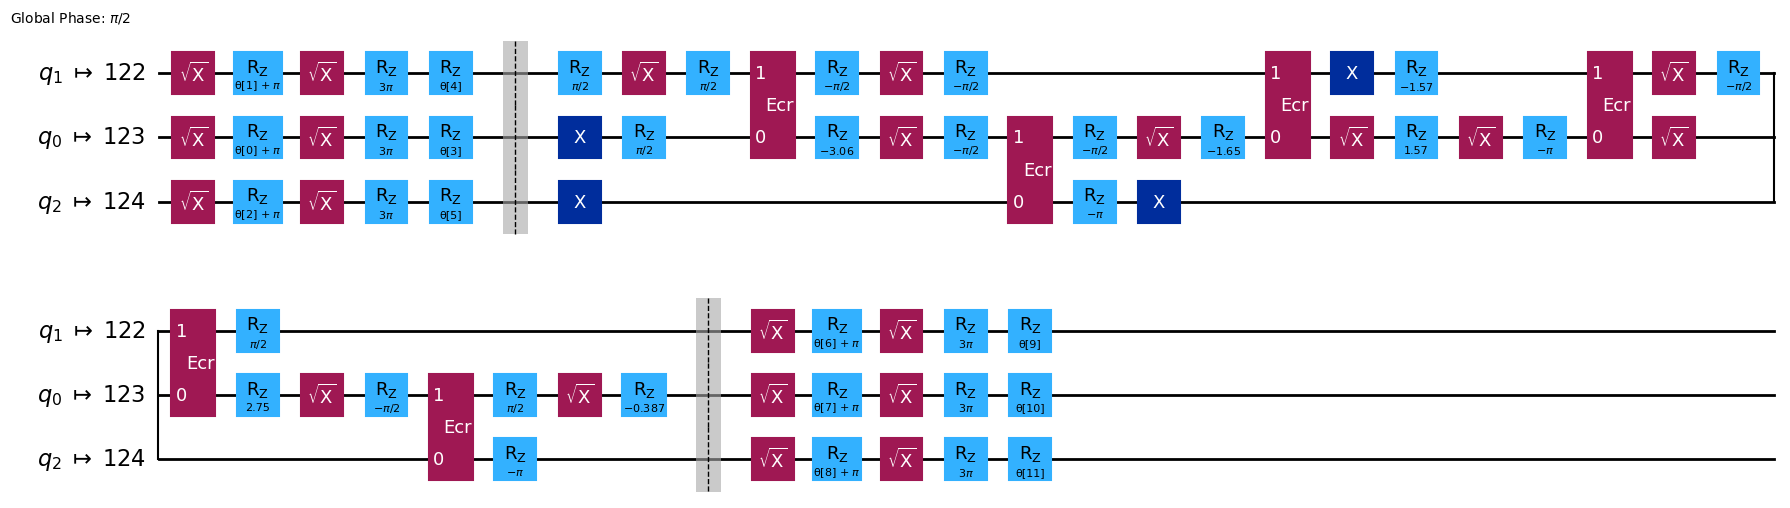

In [65]:
isa_circuit.draw('mpl', idle_wires=False,)


In [66]:
hamiltonian_isa = pauli_op.apply_layout(layout=isa_circuit.layout)


In [67]:
def cost_func(params, ansatz, hamiltonian, estimator, callback_dict):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (EstimatorV2): Estimator primitive instance

    Returns:
        float: Energy estimate
    """
    pub = (ansatz, hamiltonian, [params])
    result = estimator.run([pub]).result()
    energy = result[0].data.evs[0]

    callback_dict["iters"] += 1
    callback_dict["prev_vector"] = params
    callback_dict["cost_history"].append(energy)

    ### Don't change any code past this line ###
    print(energy)
    return energy, result

# https://learning.quantum.ibm.com/course/variational-algorithm-design/cost-functions
# above code was done through


In [68]:
grade_lab1_ex6(cost_func) # Expected result type: Callable


[0.66308594]
Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [69]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

In [70]:
x0 = 2 * np.pi * np.random.random(num_params)
x0

array([5.48967659, 0.75856077, 0.72293106, 5.83214892, 1.16356316,
       5.64913761, 4.0078168 , 5.20130357, 4.59657701, 4.52030435,
       5.20014963, 2.6848478 ])

In [71]:
# Use FakeSherbrooke to simulate with noise that matches closer to the real experiment. This will run slower.
## Use AerSimulator to simulate without noise to quickly iterate. This will run faster.

backend = FakeSherbrooke()
# backend = AerSimulator()

# ### Don't change any code past this line ###

# Here we have updated the cost function to return only the energy to be compatible with recent scipy versions (>=1.10)
def cost_func_2(*args, **kwargs):
    energy, result = cost_func(*args, **kwargs)
    return energy

with Session(backend=backend) as session:
    estimator = Estimator(session=session)

    res = minimize(
        cost_func_2,
        x0,
        args=(isa_circuit, hamiltonian_isa, estimator, callback_dict),
        method="cobyla",
        options={'maxiter': 30})

-0.08740234375
0.22900390625
-0.44384765625
-0.6318359375
-0.6376953125
-0.59765625
-0.6875
-0.05517578125
-0.7158203125
-0.78369140625
-0.77734375
-0.7822265625
-0.80078125
-1.3251953125
-1.97998046875
-1.583984375
-2.1943359375
-2.4892578125
-2.5029296875
-2.78515625
-2.76318359375
-2.568359375
-2.77783203125
-2.5751953125
-2.705078125
-2.37744140625
-2.6650390625
-2.6337890625
-2.7421875
-2.68505859375


In [72]:
grade_lab1_ex7(res) # Expected result type: OptimizeResult


Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


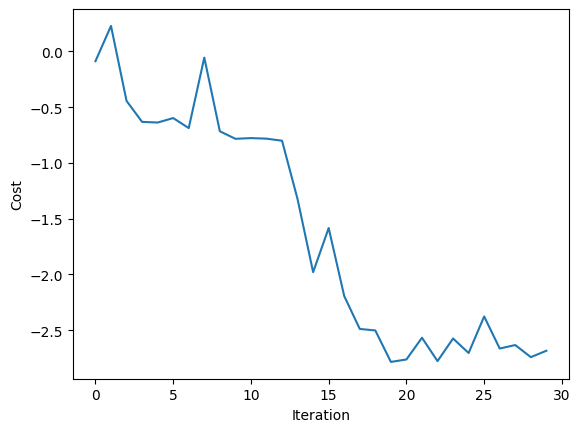

In [73]:
fig, ax = plt.subplots()
plt.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.draw()